### 데이터 전처리

#### 주식형 펀드 전처리

In [252]:
import pandas as pd

# 주식형 펀드 파일 불러오기
fund_df = pd.read_excel('./excel/주식형펀드/미래에셋3억만들기솔로몬증권투자신탁1호(주식)_가격변동추이_20220728.xls')
fund_df.head(5)

,기준일자,기준가격,전일대비\n등락,과표기준\n가격,설정원본,벤치마크지수,벤치마크지수.1,벤치마크지수.2,벤치마크지수.3,벤치마크지수.4
0,기준일자,기준가격,전일대비\n등락,과표기준\n가격,설정원본,KOSPI,KOSPI200,KOSDAQ,국공채(3년만기),회사채(3년만기)
1,2022/07/01,983.32,-16.58,1014.15,83953,2305.42,304.02,729.48,3.439,4.691
2,2022/06/30,999.9,-18,1014.14,84373,2332.64,307.2,745.44,3.552,4.794
3,2022/06/29,1017.9,10.85,1011.44,84396,2377.99,312.66,762.35,3.552,4.793
4,2022/06/28,1007.05,15.74,1011.44,84403,2422.09,319.11,769.51,3.552,4.793


In [253]:
# 필요한 컬럼만 남긴다
# 기준일자, 기준가격, 전일대비\n등락, 벤치마크지수
fund_df = fund_df[["기준일자", "기준가격", "벤치마크지수"]]
fund_df.head()

,기준일자,기준가격,벤치마크지수
0,기준일자,기준가격,KOSPI
1,2022/07/01,983.32,2305.42
2,2022/06/30,999.9,2332.64
3,2022/06/29,1017.9,2377.99
4,2022/06/28,1007.05,2422.09


In [254]:
# 컬럼명 변경
fund_df.rename(columns={"벤치마크지수" : "KOSPI"}, inplace=True)
fund_df.head()

,기준일자,기준가격,KOSPI
0,기준일자,기준가격,KOSPI
1,2022/07/01,983.32,2305.42
2,2022/06/30,999.9,2332.64
3,2022/06/29,1017.9,2377.99
4,2022/06/28,1007.05,2422.09


In [255]:
# 불필요 행 제거
fund_df = fund_df.loc[1:]
fund_df.head()

,기준일자,기준가격,KOSPI
1,2022/07/01,983.32,2305.42
2,2022/06/30,999.9,2332.64
3,2022/06/29,1017.9,2377.99
4,2022/06/28,1007.05,2422.09
5,2022/06/27,991.31,2401.92


In [256]:
# 기준일자 오름차순으로 변경
fund_df.sort_values("기준일자", ascending=True, inplace=True)
fund_df.head()

,기준일자,기준가격,KOSPI
765,2019/06/03,895.87,2067.85
764,2019/06/04,904.98,2066.97
763,2019/06/05,903.08,2069.11
762,2019/06/07,906.01,2072.33
761,2019/06/10,909.27,2099.49


In [257]:
# 인덱스 재설정
fund_df.reset_index(drop=True, inplace=True)
fund_df.head()

,기준일자,기준가격,KOSPI
0,2019/06/03,895.87,2067.85
1,2019/06/04,904.98,2066.97
2,2019/06/05,903.08,2069.11
3,2019/06/07,906.01,2072.33
4,2019/06/10,909.27,2099.49


In [258]:
# 기준월 컬럼 생성
fund_df["기준일자"] = fund_df["기준일자"].str.replace("/", "")
fund_df["기준월"] = fund_df["기준일자"].astype(str).str[:6]
fund_df.head()

,기준일자,기준가격,KOSPI,기준월
0,20190603,895.87,2067.85,201906
1,20190604,904.98,2066.97,201906
2,20190605,903.08,2069.11,201906
3,20190607,906.01,2072.33,201906
4,20190610,909.27,2099.49,201906


In [259]:
# 일별수익률 컬럼 생성 및 계산
fund_df["일별수익률"] = fund_df["기준가격"].pct_change()
fund_df.head()

,기준일자,기준가격,KOSPI,기준월,일별수익률
0,20190603,895.87,2067.85,201906,NaN
1,20190604,904.98,2066.97,201906,0.010169
2,20190605,903.08,2069.11,201906,-0.002099
3,20190607,906.01,2072.33,201906,0.003244
4,20190610,909.27,2099.49,201906,0.003598


In [260]:
# KOSPI 일별수익률 컬럼 생성 및 계산
fund_df["KOSPI 일별수익률"] = fund_df["KOSPI"].pct_change()
fund_df.head()

,기준일자,기준가격,KOSPI,기준월,일별수익률,KOSPI 일별수익률
0,20190603,895.87,2067.85,201906,NaN,NaN
1,20190604,904.98,2066.97,201906,0.010169,-0.000426
2,20190605,903.08,2069.11,201906,-0.002099,0.001035
3,20190607,906.01,2072.33,201906,0.003244,0.001556
4,20190610,909.27,2099.49,201906,0.003598,0.013106


In [261]:
# 결측치 제거
fund_df.dropna(inplace=True)
fund_df.reset_index(drop=True, inplace=True)
fund_df.head()

,기준일자,기준가격,KOSPI,기준월,일별수익률,KOSPI 일별수익률
0,20190604,904.98,2066.97,201906,0.010169,-0.000426
1,20190605,903.08,2069.11,201906,-0.002099,0.001035
2,20190607,906.01,2072.33,201906,0.003244,0.001556
3,20190610,909.27,2099.49,201906,0.003598,0.013106
4,20190611,918.61,2111.82,201906,0.010272,0.005873


In [262]:
fund_df.dtypes

기준일자            object
기준가격            object
KOSPI           object
기준월             object
일별수익률          float64
KOSPI 일별수익률    float64
dtype: object

In [263]:
# 수익률 표준편차
monthly_std = fund_df.groupby(["기준월"])["일별수익률"].std(ddof=0)
monthly_std = pd.DataFrame(monthly_std)
monthly_std

,일별수익률
기준월,
201906,0.005244
201907,0.007742
201908,0.009778
201909,0.007271
201910,0.007321
201911,0.006987
201912,0.007980
202001,0.012525
202002,0.014963


In [264]:
# KOSPI 수익률 표준편차
kospi_monthly_std = fund_df.groupby(["기준월"])["KOSPI 일별수익률"].std(ddof=0)
kospi_monthly_std = pd.DataFrame(kospi_monthly_std)
kospi_monthly_std

,KOSPI 일별수익률
기준월,
201906,0.004802
201907,0.008155
201908,0.010158
201909,0.006104
201910,0.007200
201911,0.008222
201912,0.006237
202001,0.011438
202002,0.015379


In [265]:
# 기준일자별 마지막 날짜
monthly_last_day = fund_df.groupby(["기준월"])["기준일자"].max()
monthly_last_day = pd.DataFrame(monthly_last_day)
monthly_last_day

,기준일자
기준월,
201906,20190628
201907,20190731
201908,20190830
201909,20190930
201910,20191031
201911,20191129
201912,20191231
202001,20200131
202002,20200228


In [266]:
fund_df.drop(["일별수익률", "KOSPI 일별수익률"], axis=1, inplace=True)

In [267]:
df = pd.merge(monthly_last_day, fund_df, how="left", on="기준일자")
df

,기준일자,기준가격,KOSPI,기준월
0,20190628,927.94,2130.62,201906
1,20190731,892.02,2030.05,201907
2,20190830,868.3,1967.79,201908
3,20190930,925.39,2063.05,201909
4,20191031,928.09,2083.48,201910
5,20191129,931.71,2089.8,201911
6,20191231,989.23,2197.67,201912
7,20200131,967.43,2131.08,202001
8,20200228,940.15,1987.01,202002
9,20200331,797.9,1754.64,202003


In [268]:
df = pd.merge(df, monthly_std, how="left", on="기준월")
df

,기준일자,기준가격,KOSPI,기준월,일별수익률
0,20190628,927.94,2130.62,201906,0.005244
1,20190731,892.02,2030.05,201907,0.007742
2,20190830,868.3,1967.79,201908,0.009778
3,20190930,925.39,2063.05,201909,0.007271
4,20191031,928.09,2083.48,201910,0.007321
5,20191129,931.71,2089.8,201911,0.006987
6,20191231,989.23,2197.67,201912,0.007980
7,20200131,967.43,2131.08,202001,0.012525
8,20200228,940.15,1987.01,202002,0.014963
9,20200331,797.9,1754.64,202003,0.039401


In [269]:
df = pd.merge(df, kospi_monthly_std, how="left", on="기준월")
df

,기준일자,기준가격,KOSPI,기준월,일별수익률,KOSPI 일별수익률
0,20190628,927.94,2130.62,201906,0.005244,0.004802
1,20190731,892.02,2030.05,201907,0.007742,0.008155
2,20190830,868.3,1967.79,201908,0.009778,0.010158
3,20190930,925.39,2063.05,201909,0.007271,0.006104
4,20191031,928.09,2083.48,201910,0.007321,0.007200
5,20191129,931.71,2089.8,201911,0.006987,0.008222
6,20191231,989.23,2197.67,201912,0.007980,0.006237
7,20200131,967.43,2131.08,202001,0.012525,0.011438
8,20200228,940.15,1987.01,202002,0.014963,0.015379
9,20200331,797.9,1754.64,202003,0.039401,0.041112


In [270]:
df.rename(columns={"일별수익률" : "월별 표준편차",
                   "KOSPI 일별수익률" : "KOSPI 월별 표준편차"}, inplace=True)
df.head()

,기준일자,기준가격,KOSPI,기준월,월별 표준편차,KOSPI 월별 표준편차
0,20190628,927.94,2130.62,201906,0.005244,0.004802
1,20190731,892.02,2030.05,201907,0.007742,0.008155
2,20190830,868.3,1967.79,201908,0.009778,0.010158
3,20190930,925.39,2063.05,201909,0.007271,0.006104
4,20191031,928.09,2083.48,201910,0.007321,0.007200


In [271]:
# 월별수익률 컬럼 생성
df["월별수익률"] = df["기준가격"].pct_change()
df.head()

,기준일자,기준가격,KOSPI,기준월,월별 표준편차,KOSPI 월별 표준편차,월별수익률
0,20190628,927.94,2130.62,201906,0.005244,0.004802,NaN
1,20190731,892.02,2030.05,201907,0.007742,0.008155,-0.038709
2,20190830,868.3,1967.79,201908,0.009778,0.010158,-0.026591
3,20190930,925.39,2063.05,201909,0.007271,0.006104,0.065749
4,20191031,928.09,2083.48,201910,0.007321,0.007200,0.002918


In [272]:
# KOSPI 월별수익률 컬럼 생성
df["KOSPI 월별수익률"] = df["KOSPI"].pct_change()
df.head()

,기준일자,기준가격,KOSPI,기준월,월별 표준편차,KOSPI 월별 표준편차,월별수익률,KOSPI 월별수익률
0,20190628,927.94,2130.62,201906,0.005244,0.004802,NaN,NaN
1,20190731,892.02,2030.05,201907,0.007742,0.008155,-0.038709,-0.047202
2,20190830,868.3,1967.79,201908,0.009778,0.010158,-0.026591,-0.030669
3,20190930,925.39,2063.05,201909,0.007271,0.006104,0.065749,0.048410
4,20191031,928.09,2083.48,201910,0.007321,0.007200,0.002918,0.009903


In [274]:
df.dropna(inplace=True)
df.reset_index(drop=True, inplace=True)
df.head()

,기준일자,기준가격,KOSPI,기준월,월별 표준편차,KOSPI 월별 표준편차,월별수익률,KOSPI 월별수익률
0,20190731,892.02,2030.05,201907,0.007742,0.008155,-0.038709,-0.047202
1,20190830,868.3,1967.79,201908,0.009778,0.010158,-0.026591,-0.030669
2,20190930,925.39,2063.05,201909,0.007271,0.006104,0.065749,0.048410
3,20191031,928.09,2083.48,201910,0.007321,0.007200,0.002918,0.009903
4,20191129,931.71,2089.8,201911,0.006987,0.008222,0.003900,0.003033


In [275]:
df = df[["기준일자", "기준가격", "KOSPI", "기준월", "월별수익률", "월별 표준편차", "KOSPI 월별수익률", "KOSPI 월별 표준편차"]]
df.head()

,기준일자,기준가격,KOSPI,기준월,월별수익률,월별 표준편차,KOSPI 월별수익률,KOSPI 월별 표준편차
0,20190731,892.02,2030.05,201907,-0.038709,0.007742,-0.047202,0.008155
1,20190830,868.3,1967.79,201908,-0.026591,0.009778,-0.030669,0.010158
2,20190930,925.39,2063.05,201909,0.065749,0.007271,0.048410,0.006104
3,20191031,928.09,2083.48,201910,0.002918,0.007321,0.009903,0.007200
4,20191129,931.71,2089.8,201911,0.003900,0.006987,0.003033,0.008222


#### CD금리 전처리

In [277]:
import pandas as pd

# 월별 CD금리 파일 불러오기
cd_df = pd.read_csv('./csv/월별_CD금리.csv')
cd_df.head()

,변환,원자료
0,2019/07,1.68
1,2019/08,1.49
2,2019/09,1.54
3,2019/10,1.46
4,2019/11,1.52


In [341]:
cd_df

,변환,원자료
0,2019/07,1.68
1,2019/08,1.49
2,2019/09,1.54
3,2019/10,1.46
4,2019/11,1.52
5,2019/12,1.53
6,2020/01,1.47
7,2020/02,1.42
8,2020/03,1.23
9,2020/04,1.10


In [345]:
cd_df["원자료"].loc[30:].mean()

1.6316666666666666

In [278]:
# df 복사
fund_cd_df = df.copy()

In [279]:
# CD금리 컬럼 추가
fund_cd_df["CD금리"] = cd_df["원자료"]
fund_cd_df.head()

,기준일자,기준가격,KOSPI,기준월,월별수익률,월별 표준편차,KOSPI 월별수익률,KOSPI 월별 표준편차,CD금리
0,20190731,892.02,2030.05,201907,-0.038709,0.007742,-0.047202,0.008155,1.68
1,20190830,868.3,1967.79,201908,-0.026591,0.009778,-0.030669,0.010158,1.49
2,20190930,925.39,2063.05,201909,0.065749,0.007271,0.048410,0.006104,1.54
3,20191031,928.09,2083.48,201910,0.002918,0.007321,0.009903,0.007200,1.46
4,20191129,931.71,2089.8,201911,0.003900,0.006987,0.003033,0.008222,1.52


In [280]:
fund_cd_df["CD금리"] = fund_cd_df["CD금리"]/100

In [284]:
fund_cd_df.dropna(inplace=True)
fund_cd_df.head()

,기준일자,기준가격,KOSPI,기준월,월별수익률,월별 표준편차,KOSPI 월별수익률,KOSPI 월별 표준편차,CD금리
0,20190731,892.02,2030.05,201907,-0.038709,0.007742,-0.047202,0.008155,0.0168
1,20190830,868.3,1967.79,201908,-0.026591,0.009778,-0.030669,0.010158,0.0149
2,20190930,925.39,2063.05,201909,0.065749,0.007271,0.048410,0.006104,0.0154
3,20191031,928.09,2083.48,201910,0.002918,0.007321,0.009903,0.007200,0.0146
4,20191129,931.71,2089.8,201911,0.003900,0.006987,0.003033,0.008222,0.0152


### 정규성 검정

In [285]:
from scipy.stats import shapiro
import numpy as np

shapiro(fund_cd_df["월별수익률"])

ShapiroResult(statistic=0.9501985311508179, pvalue=0.10609137266874313)

d:\anaconda3\envs\py36_32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='월별수익률', ylabel='Density'>

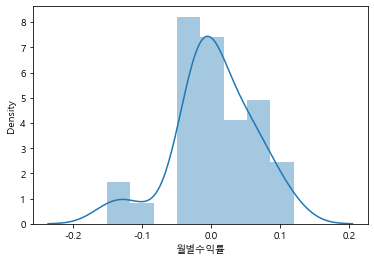

In [286]:
# 히스토그램
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"

sns.distplot(fund_cd_df["월별수익률"])

d:\anaconda3\envs\py36_32\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='월별수익률', ylabel='Density'>

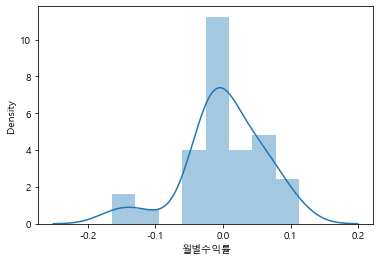

In [287]:
sns.distplot(np.log1p(fund_cd_df["월별수익률"]))

((array([-2.07334886, -1.68217954, -1.44830429, -1.27437681, -1.13225357,
         -1.00993636, -0.90112151, -0.80205412, -0.71029762, -0.62416759,
         -0.54243995, -0.46418751, -0.38868208, -0.31533241, -0.24364313,
         -0.17318609, -0.10357945, -0.03447167,  0.03447167,  0.10357945,
          0.17318609,  0.24364313,  0.31533241,  0.38868208,  0.46418751,
          0.54243995,  0.62416759,  0.71029762,  0.80205412,  0.90112151,
          1.00993636,  1.13225357,  1.27437681,  1.44830429,  1.68217954,
          2.07334886]),
  array([-0.15130564, -0.13122372, -0.10554706, -0.04641622, -0.0387094 ,
         -0.03213274, -0.02819842, -0.02659133, -0.02270643, -0.02203734,
         -0.02118577, -0.01882895, -0.01857116, -0.01353127, -0.01016321,
         -0.0037636 , -0.00254079,  0.00116532,  0.00291769,  0.00390048,
          0.00617445,  0.00617756,  0.02205989,  0.02314195,  0.02572999,
          0.02630035,  0.03700836,  0.05203343,  0.05560503,  0.05835866,
          0.06

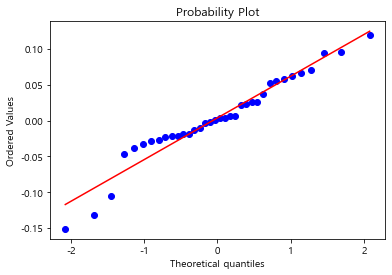

In [289]:
# Q-Q plot
import scipy.stats as stats

stats.probplot(fund_cd_df["월별수익률"], plot=plt)

((array([-2.07334886, -1.68217954, -1.44830429, -1.27437681, -1.13225357,
         -1.00993636, -0.90112151, -0.80205412, -0.71029762, -0.62416759,
         -0.54243995, -0.46418751, -0.38868208, -0.31533241, -0.24364313,
         -0.17318609, -0.10357945, -0.03447167,  0.03447167,  0.10357945,
          0.17318609,  0.24364313,  0.31533241,  0.38868208,  0.46418751,
          0.54243995,  0.62416759,  0.71029762,  0.80205412,  0.90112151,
          1.00993636,  1.13225357,  1.27437681,  1.44830429,  1.68217954,
          2.07334886]),
  array([-0.16405616, -0.14066963, -0.11154298, -0.04752799, -0.03947852,
         -0.03266033, -0.02860363, -0.02695128, -0.02296819, -0.02228379,
         -0.02141341, -0.01900847, -0.01874577, -0.01362365, -0.01021521,
         -0.00377071, -0.00254403,  0.00116464,  0.00291344,  0.0038929 ,
          0.00615547,  0.00615856,  0.02182009,  0.02287824,  0.02540454,
          0.02596044,  0.03633999,  0.05072489,  0.05411409,  0.05671927,
          0.05

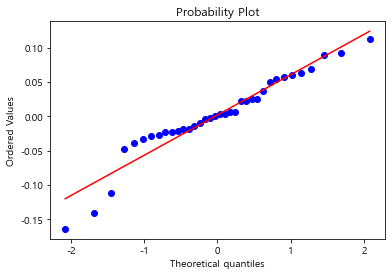

In [ ]:
stats.probplot(np.log1p(fund_cd_df["월별수익률"]), plot=plt)

In [292]:
fund_cd_df.head()

,기준일자,기준가격,KOSPI,기준월,월별수익률,월별 표준편차,KOSPI 월별수익률,KOSPI 월별 표준편차,CD금리
0,20190731,892.02,2030.05,201907,-0.038709,0.007742,-0.047202,0.008155,0.0168
1,20190830,868.3,1967.79,201908,-0.026591,0.009778,-0.030669,0.010158,0.0149
2,20190930,925.39,2063.05,201909,0.065749,0.007271,0.048410,0.006104,0.0154
3,20191031,928.09,2083.48,201910,0.002918,0.007321,0.009903,0.007200,0.0146
4,20191129,931.71,2089.8,201911,0.003900,0.006987,0.003033,0.008222,0.0152


In [309]:
# 초과수익률 계산
excess_return = fund_cd_df["월별수익률"]-fund_cd_df["CD금리"]
kospi_excess_return = fund_cd_df["KOSPI 월별수익률"]-fund_cd_df["CD금리"]
return_std = fund_cd_df["월별 표준편차"]
kospi_return_std = fund_cd_df["KOSPI 월별 표준편차"]

In [333]:
sharpe_df = pd.DataFrame()
sharpe_df["기준월"] = fund_cd_df["기준월"]
sharpe_df["종가"] = fund_cd_df["기준가격"]
sharpe_df["KOSPI 종가"] = fund_cd_df["KOSPI"]
sharpe_df["초과수익률"] = excess_return
sharpe_df["월별 표준편차"] = return_std
sharpe_df["KOSPI 초과수익률"] = kospi_excess_return
sharpe_df["KOSPI 월별 표준편차"] = kospi_return_std
sharpe_df

,기준월,종가,KOSPI 종가,초과수익률,월별 표준편차,KOSPI 초과수익률,KOSPI 월별 표준편차
0,201907,892.02,2030.05,-0.055509,0.007742,-0.064002,0.008155
1,201908,868.3,1967.79,-0.041491,0.009778,-0.045569,0.010158
2,201909,925.39,2063.05,0.050349,0.007271,0.033010,0.006104
3,201910,928.09,2083.48,-0.011682,0.007321,-0.004697,0.007200
4,201911,931.71,2089.8,-0.011300,0.006987,-0.012167,0.008222
5,201912,989.23,2197.67,0.046436,0.007980,0.036317,0.006237
6,202001,967.43,2131.08,-0.036737,0.012525,-0.045000,0.011438
7,202002,940.15,1987.01,-0.042398,0.014963,-0.081804,0.015379
8,202003,797.9,1754.64,-0.163606,0.039401,-0.129245,0.041112
9,202004,874.63,1947.56,0.085165,0.016254,0.098948,0.017249


In [347]:
sharpe_df["샤프지수"] = ""
sharpe_df["샤프지수"] = sharpe_df["초과수익률"].apply(lambda x : x/sharpe_df["월별 표준편차"] if x >= 0 else x*sharpe_df["월별 표준편차"])

In [335]:
sharpe_df["KOSPI 샤프지수"] = ""
sharpe_df["KOSPI 샤프지수"] = sharpe_df["KOSPI 초과수익률"].apply(lambda x : x/sharpe_df["KOSPI 월별 표준편차"] if x >= 0 else x*sharpe_df["KOSPI 월별 표준편차"])

In [336]:
sharpe_df["CD금리"] = fund_cd_df["CD금리"]

In [337]:
sharpe_df.set_index(["기준월"], inplace=True)
sharpe_df.head()

,종가,KOSPI 종가,초과수익률,월별 표준편차,KOSPI 초과수익률,KOSPI 월별 표준편차,샤프지수,KOSPI 샤프지수,CD금리
기준월,,,,,,,,,
201907,892.02,2030.05,-0.055509,0.007742,-0.064002,0.008155,-0.000430,-0.000522,0.0168
201908,868.3,1967.79,-0.041491,0.009778,-0.045569,0.010158,-0.000321,-0.000372,0.0149
201909,925.39,2063.05,0.050349,0.007271,0.033010,0.006104,6.503323,4.047777,0.0154
201910,928.09,2083.48,-0.011682,0.007321,-0.004697,0.007200,-0.000090,-0.000038,0.0146
201911,931.71,2089.8,-0.011300,0.006987,-0.012167,0.008222,-0.000087,-0.000099,0.0152


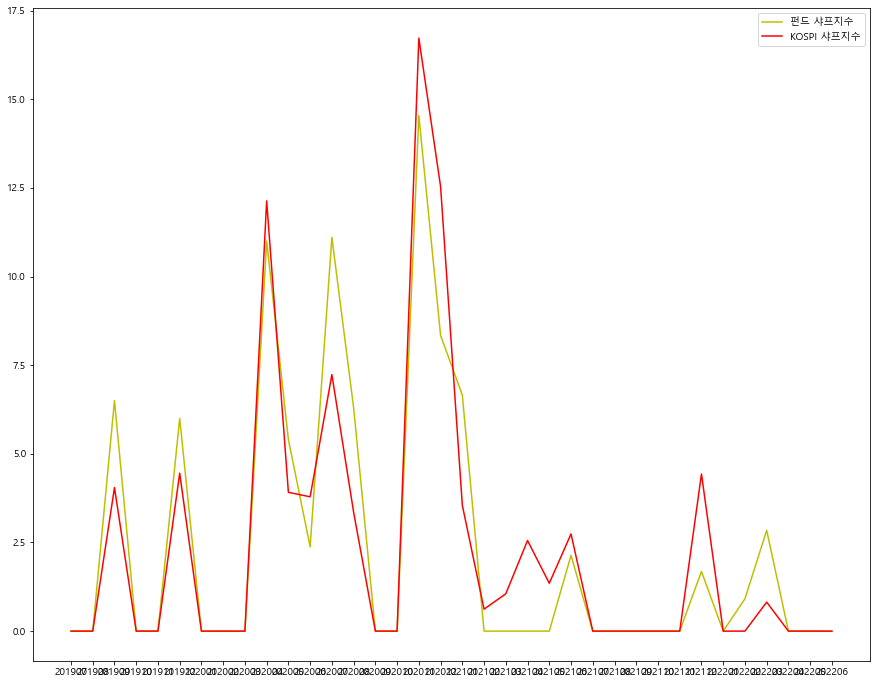

In [327]:
plt.figure(figsize=(15, 12))
plt.plot(sharpe_df["샤프지수"], c="y", label="펀드 샤프지수")
plt.plot(sharpe_df["KOSPI 샤프지수"], c="r", label="KOSPI 샤프지수")
plt.legend()


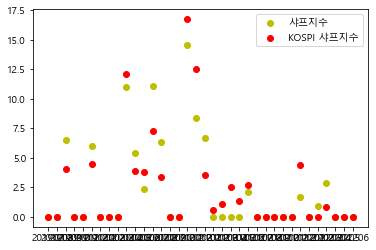

In [325]:
plt.scatter(sharpe_df.index, sharpe_df["샤프지수"], c="y", label="샤프지수")
plt.scatter(sharpe_df.index, sharpe_df["KOSPI 샤프지수"], c="r", label="KOSPI 샤프지수")
plt.legend()
plt.show()